In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [2]:
df_train = pd.read_csv('IrisData.csv') 

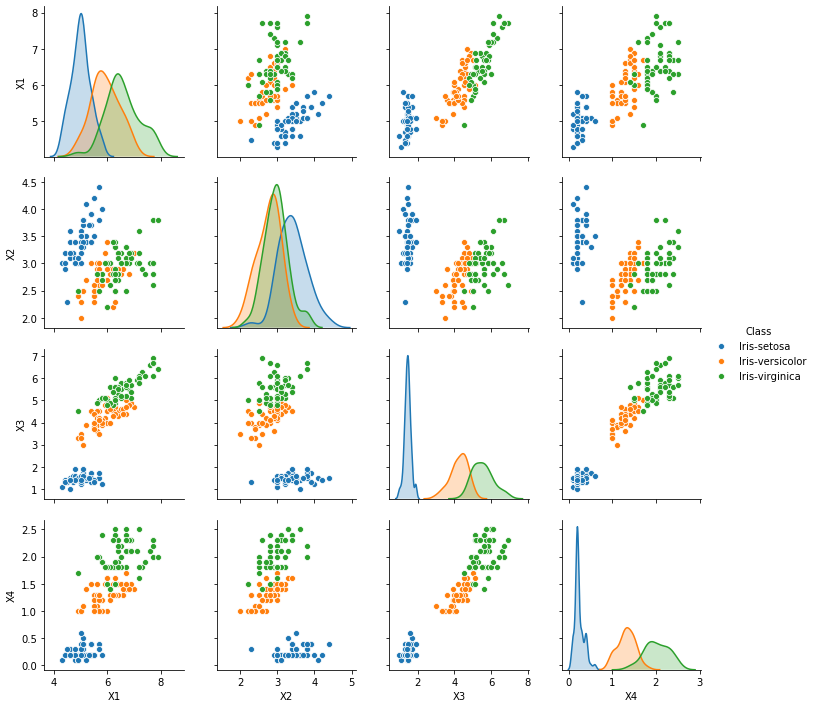

In [3]:
sns.pairplot(df_train,height=2.5,hue="Class")

In [8]:
class Perceptron:
    def __init__ (self, features, classes, epochs,alpha,bias = 0 ):
        self.features = features
        self.classes = classes
        self.epochs = epochs
        self.alpha = alpha
        self.bias = bias

    #Load DataSet
    def load_data(self,file_name):
        dataset = pd.read_csv(file_name)
        return dataset

    #Prepare Data to work on
    def prepare_data(self,data):
        label = data.iloc[:,-1]
        data = data.loc[:,self.features]
        data.insert(2,'Class',label)
        #print(data)
        dic = {0:'Iris-setosa',1:'Iris-versicolor',2:'Iris-virginica'}
        data = pd.concat([data[data.Class == dic[self.classes[0]]],data[data.Class == dic[self.classes[1]]]], axis=0 )
        if self.bias != 0:
            data.insert(0,'bias',1)
        #Get Number of Columns
        cols = len(data.columns)-1
        
        #Label Encoder for Class Column
        #le = LabelEncoder()
        #data.iloc[:,cols] = le.fit_transform(data.iloc[:,cols])
        labels = data.Class
        for i in range(len(data)):
            if labels[i]== dic[self.classes[0]]:
                labels[i]=1
            else:
                labels[i]=-1
        data.Class = labels
        return data

    #Activation Function ( Step Function )
    def signum(self,net):
        if(net>0):
            return 1
        elif(net<0):
            return -1
        else:
            return 0
        

    #Train Our Model
    def train(self,x,y):
        weights = 0 * np.random.random(x[0].shape)
        for itr in range(self.epochs):
            j = 0
            self.weights = []
            sumerror=0
            for row in x:
                unet = np.dot(row.T,weights)
                ypred= self.signum(unet)
                error = y[j] - ypred
                sumerror += error**2
                weights += np.dot(row.T,self.alpha*error)
                self.weights.append(weights)
                j+=1
            print("epochs: %d , error: %d ", itr ,sumerror)
        return self.weights

    #To Predict Single data point [X1,X2,X3,X4]
    def predict(self,weights,xtest):
        weight = weights[0]
        ypred = self.signum(np.dot(weight.T,xtest))
        return ypred

    #Predict all XTEST Data
    def test(self,xtest, ytest, weights):
        output=[]
        for i in range(len(xtest)):
            output.append(self.signum(np.dot(weights[i].T,xtest[i])))
        return output


In [10]:

#Initialize The Model Parameters
features = ['X1','X2']
classes = [0,1]
epochs = 100
bias = 0
alpha=0.001

#Create The Model
Neuron = Perceptron(features,classes,epochs,alpha,bias)
#Load Our Dataset
data=Neuron.load_data('IrisData.csv')
#Prepare My Data To Work On
cl_data = Neuron.prepare_data(data)
#print(cl_data)
#Get Number of Columns
cols = len(cl_data.columns)-1
#Take The Features input and Its' Label
X = np.array(cl_data.iloc[:,:cols])
Y = np.array(cl_data.iloc[:,cols])

#Split Data to Train/Test Data Randomly
x_train, x_test, y_train , y_test = train_test_split(X, Y, test_size=0.2, random_state=42, shuffle=True)
#Get The Paramters after Training The Network
weights = Neuron.train(x_train,y_train)
#Predict Labels for X_TEST Data
Y_Pred = Neuron.test(x_test,y_test,weights)
#Evaluation Of Model
print(y_test)
print(Y_Pred) 


C:\Users\RCSC\Anaconda\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\RCSC\Anaconda\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


epochs: %d , error: %d  0 133
epochs: %d , error: %d  1 124
epochs: %d , error: %d  2 44
epochs: %d , error: %d  3 32
epochs: %d , error: %d  4 48
epochs: %d , error: %d  5 44
epochs: %d , error: %d  6 36
epochs: %d , error: %d  7 28
epochs: %d , error: %d  8 8
epochs: %d , error: %d  9 24
epochs: %d , error: %d  10 20
epochs: %d , error: %d  11 24
epochs: %d , error: %d  12 28
epochs: %d , error: %d  13 8
epochs: %d , error: %d  14 20
epochs: %d , error: %d  15 24
epochs: %d , error: %d  16 8
epochs: %d , error: %d  17 20
epochs: %d , error: %d  18 24
epochs: %d , error: %d  19 8
epochs: %d , error: %d  20 24
epochs: %d , error: %d  21 20
epochs: %d , error: %d  22 8
epochs: %d , error: %d  23 16
epochs: %d , error: %d  24 20
epochs: %d , error: %d  25 8
epochs: %d , error: %d  26 16
epochs: %d , error: %d  27 28
epochs: %d , error: %d  28 16
epochs: %d , error: %d  29 8
epochs: %d , error: %d  30 8
epochs: %d , error: %d  31 20
epochs: %d , error: %d  32 24
epochs: %d , error: %d  33